In [54]:
%matplotlib inline
# %matplotlib notebook

# import momepy
import shapely
import geopandas
import networkx as nx
import osmnx as ox
import matplotlib.pyplot as plt
import numpy as np

ox.__version__

'1.7.0'

In [55]:
class bbox:
    def __init__(self, north,south,east,west):
        self.north=north
        self.south=south 
        self.east=east  
        self.west=west

In [56]:
# download/model a street network for some city then visualize it
# G = ox.graph_from_place("Одеса, Україна", network_type="walk")
# fig, ax = ox.plot_graph(G)


In [57]:
# ox.io.save_graphml(G, "Odessa")

In [58]:
G=ox.io.load_graphml("Odessa")

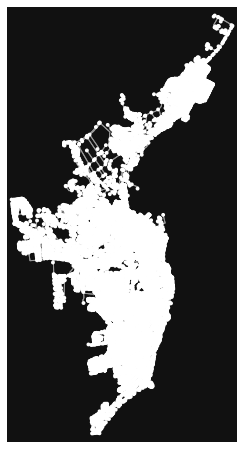

In [59]:
fig, ax = ox.plot_graph(G)

In [60]:
# you can convert your graph to node and edge GeoPandas GeoDataFrames
# gdf_nodes, gdf_edges = ox.graph_to_gdfs(G)
# gdf_nodes.head()

In [61]:
# m = gdf_nodes.explore(color="skyblue", tiles="cartodbdarkmatter")
# gdf_edges.explore(m=m, color="pink", marker_kwds={"radius": 6})

In [62]:
# gdf_edges.head()

In [63]:
# # what sized area does our network cover in square meters?
# G_proj = ox.project_graph(G)
# nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
# graph_area_m = nodes_proj.unary_union.convex_hull.area
# graph_area_m

In [64]:
# # show some basic stats about the network
# ox.basic_stats(G_proj, area=graph_area_m, clean_int_tol=15)

In [65]:
# convert graph to line graph so edges become nodes and vice versa
# edge_centrality = nx.closeness_centrality(nx.line_graph(G))
# nx.set_edge_attributes(G, edge_centrality, "edge_centrality")

In [66]:
# # color edges in original graph with closeness centralities from line graph
# ec = ox.plot.get_edge_colors_by_attr(G, "edge_centrality", cmap="magma")
# fig, ax = ox.plot_graph(G, edge_color=ec, edge_linewidth=2, node_size=0)

In [67]:
# # impute missing edge speeds and calculate edge travel times with the speed module
# G1 = ox.speed.add_edge_speeds(G)
# G1 = ox.speed.add_edge_travel_times(G1)

In [68]:
# # get the nearest network nodes to two lat/lng points with the distance module

# orig = ox.distance.nearest_nodes(G, X=30.73827, Y= 46.46852)
# dest = ox.distance.nearest_nodes(G, X=30.80827, Y= 46.50852)

In [69]:
# # find the shortest path between nodes, minimizing travel time, then plot it# find the shortest path between nodes, minimizing travel time, then plot it
# route = ox.shortest_path(G, orig, dest, weight="travel_time")
# fig, ax = ox.plot_graph_route(G, route, node_size=0)route = ox.shortest_path(G, orig, dest, weight="travel_time")
# fig, ax = ox.plot_graph_route(G, route, node_size=0)

In [70]:

# # how long is our route in meters?
# edge_lengths = ox.utils_graph.route_to_gdf(G, route)["length"]
# round(sum(edge_lengths))

In [71]:
# paek_tags = {"leisure": "park", "highway": "bus_stop"}
# place = "SoHo, New York, NY"
# gdf_park = ox.features_from_place(place, paek_tags)
# gdf_park.geometry

In [72]:

# features_list=ox.features.features_from_bbox(46.623986, 46.324014, 30.833013, 30.656398, {"tourism":["attraction","artwork"]})
# features_list.size

In [2541]:
# box= bbox(north=46.488292,south=46.480293, west=30.728495, east=30.745258)
# box= bbox(north=46.486292,south=46.480293, west=30.728495, east=30.745258)
# box= bbox(north=46.486292,south=46.483293, west=30.738495, east=30.745258)
box= bbox(north=46.486292,south=46.433293,east=30.745258, west=30.698495)

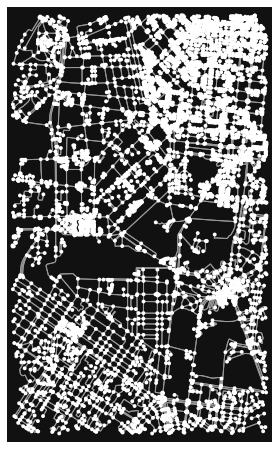

In [2542]:
G_box=ox.truncate.truncate_graph_bbox(G,box.north,box.south,box.east,box.west)
fig, ax = ox.plot_graph(G_box,show=False, close=False)

In [2543]:
# features_list_box=ox.features.features_from_bbox(box.north,box.south,box.east,box.west, {"tourism":["attraction","artwork"]})
features_list_box=ox.features.features_from_bbox(box.north,box.south,box.east,box.west, {"tourism":True})
features_list_box.head()

artwork_type          name  ... ways type
element_type osmid                                  ...          
node         1721656406    sculpture         Янгол  ...  NaN  NaN
             2112539230          NaN  Royal Street  ...  NaN  NaN
             2113415990          NaN           NaN  ...  NaN  NaN
             2117689144          NaN       Адмірал  ...  NaN  NaN
             2163549006          NaN         Хабад  ...  NaN  NaN

[5 rows x 87 columns]

In [2544]:
# features_list_box.explore()

In [2545]:
features_list_box_points=features_list_box[geopandas.GeoDataFrame(map(lambda x: type(x)==shapely.geometry.point.Point, features_list_box["geometry"])).values]
features_list_box_points.head()

artwork_type          name  ... ways type
element_type osmid                                  ...          
node         1721656406    sculpture         Янгол  ...  NaN  NaN
             2112539230          NaN  Royal Street  ...  NaN  NaN
             2113415990          NaN           NaN  ...  NaN  NaN
             2117689144          NaN       Адмірал  ...  NaN  NaN
             2163549006          NaN         Хабад  ...  NaN  NaN

[5 rows x 87 columns]

In [2546]:
# features_box_graph=momepy.gdf_to_nx(features_list_box_points, approach='primal')
# features_box_graph
# plt.plot(features_box_graph)
# plt.show()

In [2547]:
features_list_box_points_x=features_list_box_points["geometry"].x.values
features_list_box_points_y=features_list_box_points["geometry"].y.values
nodes=ox.distance.nearest_nodes(G,features_list_box_points_x,features_list_box_points_y)
nodes
# nodes_g=nx.subgraph_view(G_box,lambda x: x in nodes)
# nodes_g.nodes
nodes=list(filter(lambda x: x in list(G_box.nodes),nodes))
# nodes

In [2548]:
# G_nx=momepy.gdf_to_nx(G_box, approach='primal')
# G_nx

In [2549]:
# path=nx.algorithms.approximation.traveling_salesman_problem(G=ox.utils_graph.get_undirected(G_box),
#                                                             nodes=nodes, method=nx.algorithms.approximation.christofides)
# len(path)

In [2550]:
# ox.plot.plot_graph_route(G_box,path)

In [2551]:
# route_edges = ox.utils_graph.route_to_gdf(G_box, path)
# m= features_list_box_points.explore( marker_kwds={"radius": 6})
# route_edges.explore(m=m,color="red")

In [2552]:
features_list_box_points.explore( marker_kwds={"radius": 6})

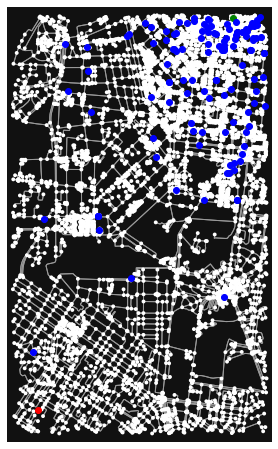

In [2579]:
# origin_point_longitude= 46.481293 
# origin_point_latitude= 30.7308495

# destination_point_longitude=46.485792
# destination_point_latitude= 30.741258


# origin_point_longitude= 46.453293 
# origin_point_latitude= 30.708495

# destination_point_longitude=46.486292
# destination_point_latitude= 30.743258


origin_point_longitude= 46.485885
origin_point_latitude= 30.739150

destination_point_longitude=46.436292
destination_point_latitude= 30.703258




fig, ax = ox.plot_graph(G_box,show=False, close=False)
ax.scatter(origin_point_latitude,origin_point_longitude, c='green')
ax.scatter(destination_point_latitude,destination_point_longitude, c='red')
ax.scatter(features_list_box_points_x,features_list_box_points_y, c='blue')
plt.show()

In [2580]:
# origin=ox.distance.nearest_nodes(G_box,origin_point_longitude, origin_point_latitude)
# destination=ox.distance.nearest_nodes(G_box,destination_point_longitude, destination_point_latitude)
origin=ox.distance.nearest_nodes(G_box, origin_point_latitude,origin_point_longitude)
destination=ox.distance.nearest_nodes(G_box, destination_point_latitude,destination_point_longitude)

In [2581]:
# Negative weights???????????????????????????????????????????????????????????????????????

# ADD heuristic!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
path_orig_dest_fast=nx.algorithms.shortest_paths.astar_path(G_box,origin,destination,weight="length")
len(path_orig_dest_fast)
# path_orig_dest

135

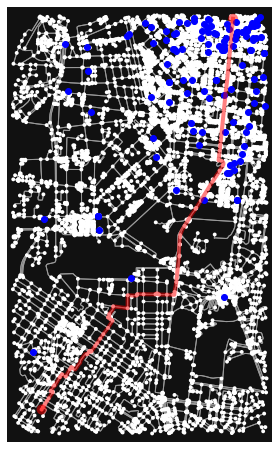

In [2582]:
fig, ax = ox.plot.plot_graph_route(G_box,path_orig_dest_fast,show=False, close=False)
ax.scatter(features_list_box_points_x,features_list_box_points_y, c='blue')
plt.show()

In [2583]:
def gauss_filter(x,y,p1,p2, sigma):
    # return np.exp(-((p1-x)*(p1-x)+((p2-y)*(p2-y)))/(2*sigma*sigma))/(2*np.pi*(sigma*sigma))
    return np.exp(-((p1-x)*(p1-x)+((p2-y)*(p2-y)))/(2*sigma*sigma))

In [2584]:
# def interestingness_func(feature):
#     return 1

# def get_interestingness_nodes_attributes (G1, features_list_points1):
#     attr_dict={n:{"interestingness_attr":0} for n in G1.nodes}
#     # print(attr_dict.values())
#     L=list(attr_dict.values()) 
#     for n in G1.nodes:
#         for i in range(len(features_list_points1)):
#             feature=features_list_points1.iloc[i]
#             # Better PROJECTION, NOT DEGREES !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
#             dist= ox.distance.euclidean(feature.geometry.y, feature.geometry.x, G1.nodes[n]["x"], G1.nodes[n]["y"])
#             # attr_dict[n]["interestingness_attr"]=attr_dict[n]["interestingness_attr"]+interestingness_func(feature)/(0.01*dist)
#             attr_dict[n]["interestingness_attr"]=attr_dict[n]["interestingness_attr"]-interestingness_func(feature)*gauss_filter(G1.nodes[n]["x"],G1.nodes[n]["y"],feature.geometry.x, feature.geometry.y)/1000
#     min_attr_dict= min([L[i]["interestingness_attr"] for i in range(len(L))])
#     # print(min_attr_dict)
#     for n in G1.nodes:
#         attr_dict[n]["interestingness_attr"]=attr_dict[n]["interestingness_attr"]+abs(min_attr_dict)
#     return attr_dict

In [2585]:
def attribute_value_func(point):
    return 1

# def get_nodes_attributes (G1, points1,name_attr1:str,sigma_local=0.0001, sigma_wide=6, k_local=1e3,k_wide=0,default_value=0,improving_attr=True):
# def get_nodes_attributes (G1, points1,name_attr1:str,sigma_local=0.0001, sigma_wide=0.0005, k_local=0,k_wide=1e1,default_value=0,improving_attr=True):
# def get_nodes_attributes (G1, points1,name_attr1:str,sigma_local=0.0001, sigma_wide=0.0005, k_local=1e2,k_wide=1e1,default_value=0,improving_attr=True):

# def get_nodes_attributes (G1, points1,name_attr1:str,sigma_local=1e-4, sigma_wide=1e-3, k_local=1e1,k_wide=1e0,default_value=0,improving_attr=True):
def get_nodes_attributes (G1, points1,name_attr1:str,sigma_local=1e-4, sigma_wide=1e-3, k_local=1e2,k_wide=1e1,default_value=0,improving_attr=True):
    attr_dict={n:{name_attr1:default_value} for n in G1.nodes}
    # print(attr_dict.values())
    for n in G1.nodes:
        for i in range(len(points1)):
            point=points1.iloc[i]
            point_x=point.geometry.x
            point_y=point.geometry.y
            # dist= dist_euclidean(d_point,n)
            # attr_dict[n]["interestingness_attr"]=attr_dict[n]["interestingness_attr"]+interestingness_func(feature)/(0.01*dist)
            addition_value=attribute_value_func(point)*(gauss_filter(point_x,point_y, G1.nodes[n]["x"], G1.nodes[n]["y"],sigma_local)*k_local
                                    +gauss_filter(point_x,point_y, G1.nodes[n]["x"], G1.nodes[n]["y"],sigma_wide)*k_wide)
            if improving_attr:
                attr_dict[n][name_attr1]=attr_dict[n][name_attr1]-addition_value
            else:
                attr_dict[n][name_attr1]=attr_dict[n][name_attr1]+addition_value
    L=list(attr_dict.values())
    if improving_attr:
        min_attr_dict= min([L[i][name_attr1] for i in range(len(L))])       
        print(abs(min_attr_dict))
    # print(min_attr_dict)
    # if improving_attr:
        for n in G1.nodes:
            attr_dict[n][name_attr1]=attr_dict[n][name_attr1]+abs(min_attr_dict)
    return attr_dict

In [2586]:
# minimizing "non-interestigness"
# interestingness_attr=get_interestingness_nodes_attributes(G_box,features_list_box_points)
interestingness_attr=get_nodes_attributes(G_box,features_list_box_points,"interestingness_attr")
nx.set_node_attributes(G_box,interestingness_attr)
# G_box.nodes[10980542]

170.02482062925299


In [2587]:
# bb=nx.betweenness_centrality(G_box)
# nx.set_node_attributes(G_box,bb,'betweenness')
# G_box.nodes[10980542]

In [2588]:
[G_box.nodes[n]["interestingness_attr"] for n in G_box.nodes]

[157.19100006502237,
 168.40930299111633,
 156.46161069988113,
 159.61857434555037,
 169.96047543536363,
 145.36257698675405,
 164.48875414057522,
 162.16836278928645,
 156.2770024969347,
 152.90781288656123,
 153.43208121348877,
 148.44382622896367,
 153.20716730038467,
 169.88051328562437,
 168.83916795462204,
 165.04567172917214,
 154.7432412390493,
 156.40878816670534,
 167.23831443321234,
 147.8283823936693,
 122.66774168826757,
 158.2388399328722,
 170.02475485047745,
 167.91663113723973,
 168.79634218876058,
 169.70479502178787,
 152.80556916173802,
 134.60592892576645,
 135.9793721233204,
 170.02482062925299,
 170.02482062925299,
 167.00002268989724,
 169.84075912065455,
 167.38305854920753,
 116.82055714368202,
 106.77087448772434,
 112.04836061328497,
 153.19402777660093,
 167.7976111440459,
 168.7657782987244,
 169.87838836170008,
 169.98549815745412,
 169.88337168261143,
 168.94603066320636,
 169.59295623087348,
 170.02130220727065,
 167.77388100368248,
 168.51787034737404,

In [2589]:
max([G_box.nodes[n]["interestingness_attr"] for n in G_box.nodes])

170.02482062925299

In [2590]:
# G_box.edges[(10980542, 4439629602, 0)]

In [2591]:
# G_box[10980542][4439629602]

In [2592]:
# def get_interestingness_edges_attributes(G1,k_length=0.5,k_inter=0.5):
#     attr_dict={edge:{"interestingness_attr_edge":0} for edge in G1.edges}
#     for edge in G1.edges:
#         attr_dict[edge]["interestingness_attr_edge"]=G1.nodes[edge[1]]["interestingness_attr"]*k_inter+k_length*G1.edges[edge]["length"]
#     return attr_dict

def get_edges_attributes(G1,name_attr1,k_length=0.2,k_attr=0.8,improving_attr=True):
# def get_edges_attributes(G1,name_attr1,k_length=0,k_attr=1,improving_attr=True):
    attr_dict={edge:{name_attr1:0} for edge in G1.edges}
    for edge in G1.edges:
        # IF DIGRAF
        
        attr_dict[edge][name_attr1]=k_length*G1.edges[edge]["length"]
        # IF NOT DIRECTED GRAF:
        # max_val=max(G1.nodes[edge[1]]["danger_attr"],G1.nodes[edge[0]]["danger_attr"])
        # attr_dict[edge][name_attr1]=max_val*k_attr+k_length*G1.edges[edge]["length"]
        if improving_attr:
          attr_dict[edge][name_attr1]=  attr_dict[edge][name_attr1]-G1.nodes[edge[1]]["interestingness_attr"]*k_attr
        else:
          attr_dict[edge][name_attr1]=  attr_dict[edge][name_attr1]+G1.nodes[edge[1]]["interestingness_attr"]*k_attr
          # attr_dict[edge][name_attr1]=  ((attr_dict[edge][name_attr1])**(1/2))*G1.nodes[edge[1]]["interestingness_attr"]*k_attr
          # attr_dict[edge][name_attr1]=  attr_dict[edge][name_attr1]*(1+G1.nodes[edge[1]]["interestingness_attr"]*k_attr)
            

    
    L=list(attr_dict.values())
    if improving_attr:
        min_attr_dict= min([L[i][name_attr1] for i in range(len(L))])
        for edge in G1.edges:
            attr_dict[edge][name_attr1]=attr_dict[edge][name_attr1]+abs(min_attr_dict)
    return attr_dict
    

In [2593]:
# interestingness_attr_edge=get_interestingness_edges_attributes(G_box)
interestingness_attr_edge=get_edges_attributes(G_box,"interestingness_attr_edge",improving_attr=False)
nx.set_edge_attributes(G_box,interestingness_attr_edge)
# G_box.edges[(10980542, 4439629602, 0)]

In [2594]:
[G_box.edges[e]["interestingness_attr_edge"] for e in G_box.edges]

[131.69843162955422,
 139.04060473564158,
 156.84298675874132,
 136.0133240892009,
 136.9117948463855,
 136.99484103948734,
 136.14218516223224,
 148.35491006580207,
 159.4220594764403,
 128.2848210946461,
 150.76509587791483,
 147.13353237612114,
 136.5919921208005,
 132.60604553063152,
 156.89648855990492,
 136.2743806460288,
 159.99870527443773,
 173.7007243344138,
 138.23973149542826,
 128.6742316295542,
 130.60773831919985,
 118.16135034519462,
 135.51651178424171,
 135.28044049937046,
 137.66438675874133,
 141.20748993344307,
 135.1083485773262,
 142.5230757264378,
 141.2833174104212,
 144.34807881386473,
 140.94053702881382,
 148.32420203800245,
 137.59896966920573,
 117.00617338221626,
 124.25845381915148,
 138.16497068794786,
 139.8905604301978,
 130.25427730084758,
 136.2617714258407,
 131.64213453865682,
 144.83870482908415,
 139.48421623260364,
 141.38700242998866,
 145.05553831919985,
 156.56775858777164,
 126.17158467059508,
 138.86206995727866,
 138.52158722635195,
 127.

In [2595]:
def dist_euclidean(a, b):
    x1=G_box.nodes[a]["x"]
    x2=G_box.nodes[b]["x"]
    y1= G_box.nodes[a]["y"]
    y2=G_box.nodes[b]["y"]
    return ((x1 - x2) ** 2 + (y1 - y2) ** 2) ** 0.5
    # return 0

In [2596]:
# ADD Heuristic!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
# path_orig_dest=nx.algorithms.shortest_paths.astar_path(G_box,origin,destination,heuristic=dist_euclidean, weight="interestingness_attr")
path_orig_dest=nx.algorithms.shortest_paths.astar_path(G_box,origin,destination, weight="interestingness_attr_edge",heuristic=dist_euclidean)
len(path_orig_dest)

86

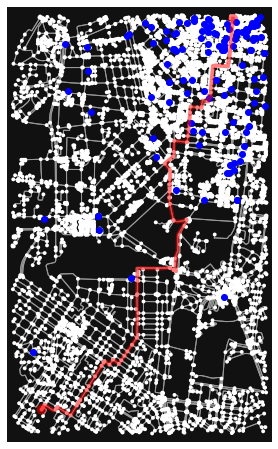

In [2597]:
fig, ax = ox.plot.plot_graph_route(G_box,path_orig_dest,show=False, close=False)
ax.scatter(features_list_box_points_x,features_list_box_points_y, c='blue')
plt.show()

In [2598]:
#TODO 
# Consider distance
# heuristic
# minus interestingness

nodes_coord=ox.utils_graph.graph_to_gdfs(G_box, edges=False, node_geometry=False)[["x", "y"]]
nodes_coord.head()

,x,y
osmid,,
10980417,30.738275,46.468524
10980419,30.736733,46.469758
10980421,30.730899,46.471836
10980422,30.731101,46.473256
10980423,30.727735,46.471970


In [2599]:
# inter_nodes=[G_box.nodes[n]["interestingness_attr"] for n in G_box.nodes]
# inter_nodes

In [2600]:
# # from mpl_toolkits.mplot3d import Axes3D

# fig = plt.figure()

# # ax = Axes3D(fig)

# ax = plt.figure().add_subplot(projection='3d')
# ax.scatter(nodes_coord["x"].values, nodes_coord["y"].values, inter_nodes, label='interestingness')
# ax.set_title("3D plot")
# ax.set_xlabel('x-axis')
# ax.set_ylabel('y-axis')
# ax.set_zlabel('z-axis')
# plt.show()

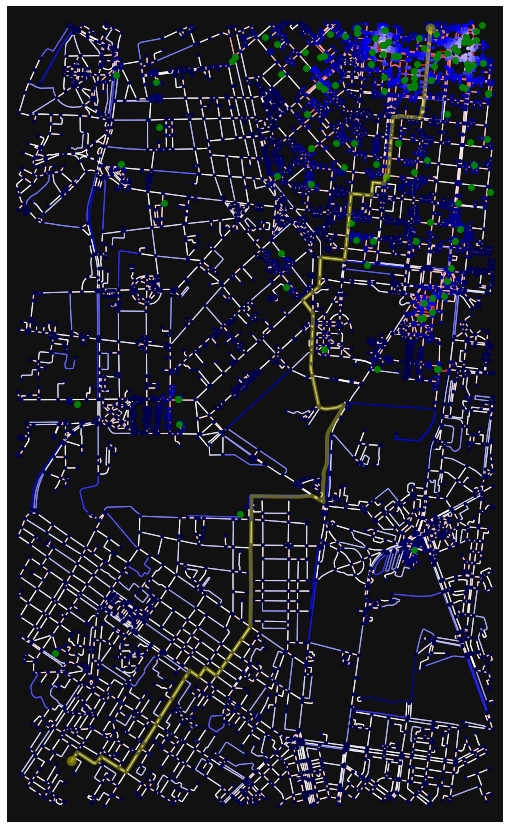

(<Figure size 1080x1080 with 1 Axes>, <Axes: >)

In [2601]:
# colormap=plt.cm.seismic
# plt.colorbar(sm)

fig, ax = ox.plot.plot_graph(G_box,
                             node_color=ox.plot.get_node_colors_by_attr(G_box,"interestingness_attr",cmap='seismic_r'),
                   edge_color=ox.plot.get_edge_colors_by_attr(G_box, "interestingness_attr_edge",cmap='seismic_r'),
                             figsize=(15,15),show=False, close=False)
ax.scatter(features_list_box_points_x,features_list_box_points_y, c='g')
ox.plot.plot_graph_route(G_box,path_orig_dest,route_color="y",ax=ax)

In [2602]:
# path_orig_dest_edges=[(path_orig_dest[i],path_orig_dest[i+1])for i in range(len(path_orig_dest)-1)]

In [2603]:
# from matplotlib.pyplot import figure

# # figure(figsize=(15, 15), dpi=80)
# fig, ax = plt.subplots()
# fig.set_size_inches(13,15)
# # fig.set_dpi(100)

# pos = nx.kamada_kawai_layout(G_box)
# colormap=plt.cm.seismic
# # nx.draw(G, pos=pos, node_color="red",node_size=4,edge_cmap=plt.cm.seismic, width=list(nx.get_edge_attributes(G,'danger_attr_edge').values()))
# nx.draw(G_box, pos=pos, cmap=colormap,node_color=list(nx.get_node_attributes(G_box,'interestingness_attr').values()),node_size=10,
#         edge_cmap=colormap, edge_color=list(nx.get_edge_attributes(G_box,'interestingness_attr_edge').values()),width=2)
# sm = plt.cm.ScalarMappable(cmap=colormap)
# sm._A = []
# # plt.colorbar(sm)
# fig.set_facecolor('#161616')
# nx.draw_networkx_nodes(G_box,pos=pos,nodelist=[origin,destination],node_color=["g","r"],node_size=30)
# nx.draw_networkx_edges(G_box,pos=pos,edgelist=path_orig_dest_edges,edge_color = "y",width=5)
